# Lab 9: Search by CNN Features

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import extract_feature

Load model: ResNet50
Using cache found in /root/.cache/torch/hub/pytorch_vision_master


## Load Dataset

In [2]:
features = []
for i in range(1, 500):
    filename = '{:05d}.png'.format(i)
    feature = extract_feature.extract_feature('dataset/{}'.format(filename))
    features.append(feature / np.linalg.norm(feature))
features = np.array(features)
np.save('features.npy', features)

## Load Test Image

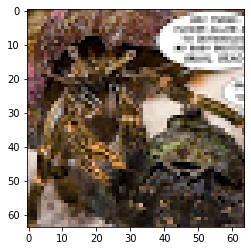

In [3]:
target_filename = '00501.png'
target_bgr = cv2.imread('test_data/{}'.format(target_filename))
target_rgb = cv2.cvtColor(target_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(target_rgb)
plt.show()

In [4]:
target_feature = extract_feature.extract_feature('test_data/{}'.format(target_filename))
target_feature /= np.linalg.norm(target_feature)

## Get 5 best matches

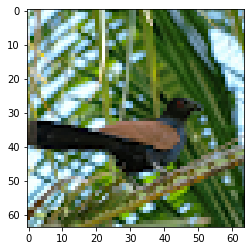

Score: 0.9959486722946167



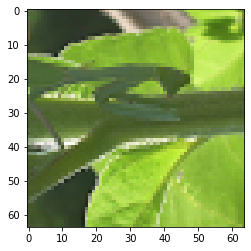

Score: 0.9959331750869751



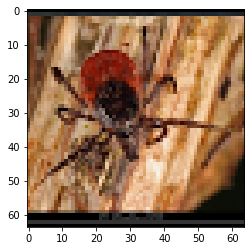

Score: 0.9959249496459961



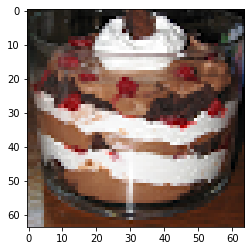

Score: 0.9959105253219604



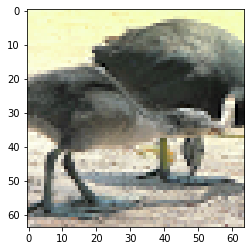

Score: 0.9958948493003845



In [5]:
scores = list(features @ target_feature)

for i in map(lambda x: scores.index(x), sorted(scores, reverse=True)[:5]):
    filename = '{:05d}.png'.format(i + 1)
    match_bgr = cv2.imread('dataset/{}'.format(filename))
    match_rgb = cv2.cvtColor(match_bgr, cv2.COLOR_BGR2RGB)

    plt.imshow(match_rgb)
    plt.show()
    print('Score: {}'.format(scores[i]))
    print()